In [84]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt, linspace, random
# from lmfit import Model
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from datetime import datetime

In [85]:
from scipy.optimize import curve_fit
import scipy.stats as stats

In [86]:
data_dir = 'D:/Thesis/dataset/'
file_path = data_dir + 'Volume Ground Truth/VolumeGroundTruth.xlsx'

In [87]:
ground_truth_data = pd.read_excel(file_path)
ground_truth_data.head()

,record id,date,time,road name,direction,road id,volume,level,lane,speed,volume/min/lane
0,1,41526,10:00:00,善缘街,西,14540,20,2,2,0.0,2.0
1,2,41526,11:55:00,善缘街,西,14540,2,2,2,0.0,0.2
2,3,41526,17:30:00,善缘街,西,14540,10,2,2,0.0,1.0
3,4,41527,09:40:00,海淀南路,西,17058,68,2,2,0.0,6.8
4,5,41527,12:40:00,海淀南路,西,17058,61,2,2,0.0,6.1


In [88]:
ground_truth_data['date'] = pd.to_datetime(ground_truth_data['date'], origin='1899-12-30', unit='D')

# Define a function to classify the day type
def classify_day_type(date):
    if date.weekday() < 5:  # 0-4 correspond to Monday-Friday
        return 'workday'
    else:  # 5-6 correspond to Saturday-Sunday
        return 'holiday'

# Apply the function to create the 'Day_type' column
ground_truth_data['Day_type'] = ground_truth_data['date'].apply(classify_day_type)

In [89]:
def time_slot_conversion(time_str):
    time_object = datetime.strptime(str(time_str), '%H:%M:%S')
    total_minutes = time_object.hour * 60 + time_object.minute
    return int(total_minutes // 10)

ground_truth_data['time_slot'] = ground_truth_data['time'].apply(time_slot_conversion)

In [90]:
ground_truth_data.head()

,record id,date,time,road name,direction,road id,volume,level,lane,speed,volume/min/lane,Day_type,time_slot
0,1,2013-09-09,10:00:00,善缘街,西,14540,20,2,2,0.0,2.0,workday,60
1,2,2013-09-09,11:55:00,善缘街,西,14540,2,2,2,0.0,0.2,workday,71
2,3,2013-09-09,17:30:00,善缘街,西,14540,10,2,2,0.0,1.0,workday,105
3,4,2013-09-10,09:40:00,海淀南路,西,17058,68,2,2,0.0,6.8,workday,58
4,5,2013-09-10,12:40:00,海淀南路,西,17058,61,2,2,0.0,6.1,workday,76


In [91]:
# ground_truth_data['direction'].unique()
ground_truth_data['direction'].value_counts()

direction
东     108
南      69
北      66
西      60
双向     33
东南     22
Name: count, dtype: int64

In [92]:
direction_mapping = {
    '西': 0, #'West'
    '东': 0, #'East'
    '东南': 0, #'Southeast'
    '北': 0, #'North'
    '南': 0, #'South'
    '双向': 1  # Two-way 'Bidirectional'
}

# Map the 'dir' column to English using the provided dictionary
ground_truth_data['dir'] = ground_truth_data['direction'].replace(direction_mapping)

C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\3390149216.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_data['dir'] = ground_truth_data['direction'].replace(direction_mapping)


In [93]:
ground_truth_data.columns

Index(['record id', 'date', 'time', 'road name', 'direction', 'road id',
       'volume', 'level', 'lane', 'speed', 'volume/min/lane', 'Day_type',
       'time_slot', 'dir'],
      dtype='object')

In [94]:
ground_truth_data_sel = ground_truth_data.loc[:, ['road id','level', 'lane', 'dir', 'Day_type', 'time_slot', 'speed', 'volume/min/lane']]

In [95]:
ground_truth_data_sel.shape

(358, 8)

In [96]:
ground_truth_level1 = ground_truth_data_sel[ground_truth_data_sel['level']<=1]
ground_truth_level2 = ground_truth_data_sel[ground_truth_data_sel['level']==2]
ground_truth_level3 = ground_truth_data_sel[ground_truth_data_sel['level']>=3]

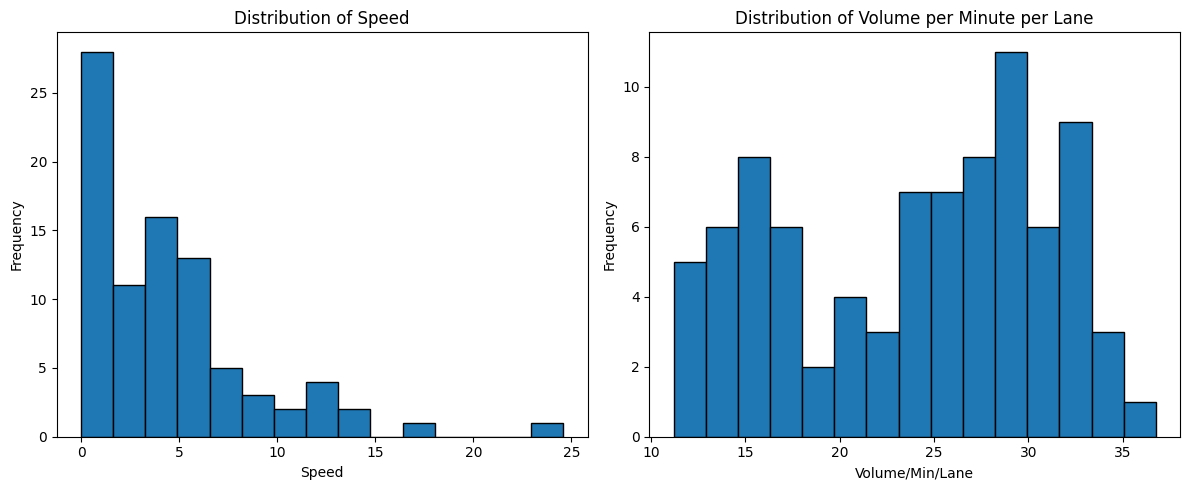

In [97]:
data = ground_truth_level1
# Plotting the distribution of 'speed' and 'volume/min/lane'
plt.figure(figsize=(12, 5))

# Speed distribution
plt.subplot(1, 2, 1)
plt.hist(data['speed'], bins=15, edgecolor='black')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')

# Volume/min/lane distribution
plt.subplot(1, 2, 2)
plt.hist(data['volume/min/lane'], bins=15, edgecolor='black')
plt.title('Distribution of Volume per Minute per Lane')
plt.xlabel('Volume/Min/Lane')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [98]:
def normal_fit(data):
    # Fit a normal distribution to the data: volume/min/lane
    mu, std = norm.fit(data['volume/min/lane'])

    # Plot the histogram of the data
    plt.figure(figsize=(8, 5))
    plt.hist(data['volume/min/lane'], bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Title and labels
    plt.title(f'Normal Distribution Fit for Volume/Min/Lane\nMean = {mu:.2f}, Std = {std:.2f}')
    plt.xlabel('Volume/Min/Lane')
    plt.ylabel('Density')

    plt.show()

In [99]:
def normal_fit2(data):
    # Fit a normal distribution to the data: volume/min/lane
    mu, std = norm.fit(data['volume/min/lane'])

    # Calculate the observed frequencies
    observed_freq, bin_edges = np.histogram(data['volume/min/lane'], bins=15, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Get bin centers for the scatter plot

    # Plot the scatter plot of observed frequencies
    plt.figure(figsize=(8, 5))
    plt.scatter(bin_centers, observed_freq, color='b', label='Observed Frequencies', zorder=5)

    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Fit Curve', zorder=3)

    # Title and labels
    plt.title(f'Normal Distribution Fit for Volume/Min/Lane\nMean = {mu:.2f}, Std = {std:.2f}')
    plt.xlabel('Volume/Min/Lane')
    plt.ylabel('Density')

    # Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming `data` is a DataFrame containing 'volume/min/lane' column
# normal_fit(data)

In [100]:
def flow_speed_trend(data):
    # Grouping data by 'time_slot' and calculating mean speed and volume per minute per lane
    time_slot_analysis = data.groupby('time_slot').agg({'speed': ['mean', 'median'], 'volume/min/lane': 'mean'}).reset_index()
    time_slot_analysis.columns = ['time_slot', 'mean_speed', 'median_speed', 'mean_volume']

    # Plotting the mean speed and mean volume trends over time slots
    plt.figure(figsize=(12, 6))

    # Mean speed trend
    plt.plot(time_slot_analysis['time_slot'], time_slot_analysis['mean_speed'], marker='o', linestyle='-', label='Mean Speed', color='b')

    # Median speed trend
    plt.plot(time_slot_analysis['time_slot'], time_slot_analysis['median_speed'], marker='x', linestyle='--', label='Median Speed', color='orange')

    # Mean volume trend
    plt.plot(time_slot_analysis['time_slot'], time_slot_analysis['mean_volume'], marker='o', linestyle='-', label='Mean Volume per Minute per Lane', color='g')

    # Plot settings
    plt.title('Speed and Volume Trends Across Different Time Slots')
    plt.xlabel('Time Slot')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [101]:
def chi_square_test_normal_fit(data, num_bins=15):
    # Ensure the data is numeric and drop any NaN or infinite values
    data_cleaned = data[np.isfinite(data['volume/min/lane'])]  # Use only numeric and finite values
    
    # Fit a normal distribution to the data
    mu, std = norm.fit(data_cleaned['volume/min/lane'])

    # Generate histogram of observed data
    observed_freq, bin_edges = np.histogram(data_cleaned['volume/min/lane'], bins=num_bins)

    # Calculate expected frequencies assuming normal distribution
    cdf_values = norm.cdf(bin_edges, mu, std)
    expected_freq = np.diff(cdf_values) * len(data_cleaned)

    # Normalize the expected frequencies so that their sum matches observed frequencies
    expected_freq *= (observed_freq.sum() / expected_freq.sum())

    # Perform Chi-square test
    chi_square_stat, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

    return chi_square_stat, p_value

In [102]:
def correlation_bar(data):
    # Correlation matrix
    correlation_matrix = data[['road id', 'lane', 'time_slot', 'speed', 'volume/min/lane']].corr()

    # Grouping by 'Day_type' and calculating mean for 'speed' and 'volume/min/lane'
    day_type_analysis = data.groupby('Day_type')[['speed', 'volume/min/lane']].mean()
    
    # Create a figure with two subplots
    plt.figure(figsize=(16, 6))

    # Subplot 1: Correlation matrix heatmap
    plt.subplot(1, 2, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')

    # Subplot 2: Bar plot for day type analysis
    plt.subplot(1, 2, 2)
    day_type_analysis.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'])
    plt.title('Mean Speed and Volume per Minute per Lane by Day Type')
    plt.ylabel('Mean Value')
    plt.xlabel('Day Type')

    # Display the plots
    plt.tight_layout()
    plt.show()

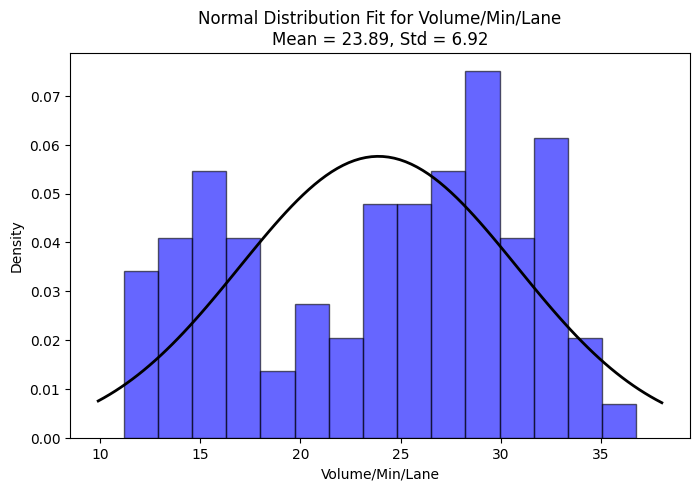

In [103]:
data = ground_truth_level1
normal_fit(data)
# flow_speed_trend(data)
# correlation_bar(data)

In [104]:
chi_square_stat, p_value = chi_square_test_normal_fit(ground_truth_level1)

print(f"Chi-square Statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Chi-square Statistic: 28.711259639372702
P-value: 0.011431079652238276
The data does not follow a normal distribution (reject H0).


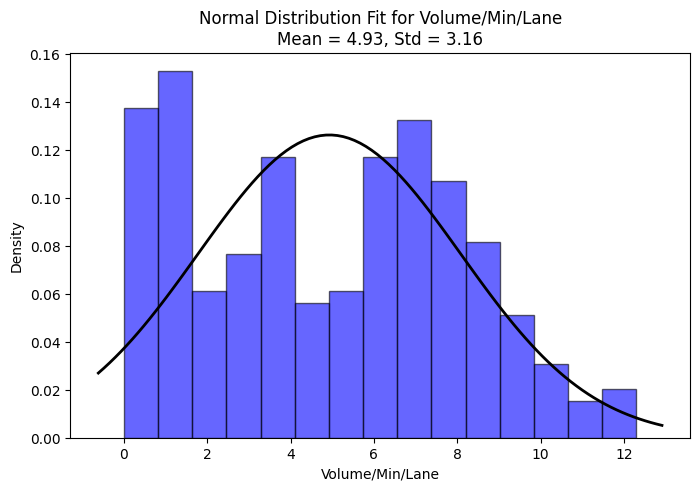

In [105]:
data = ground_truth_level2
normal_fit(data)
# normal_fit2(data)
# flow_speed_trend(data)
# correlation_bar(data)

In [106]:
chi_square_stat, p_value = chi_square_test_normal_fit(ground_truth_level2)

print(f"Chi-square Statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Chi-square Statistic: 76.4207168218795
P-value: 1.2973354085548885e-10
The data does not follow a normal distribution (reject H0).


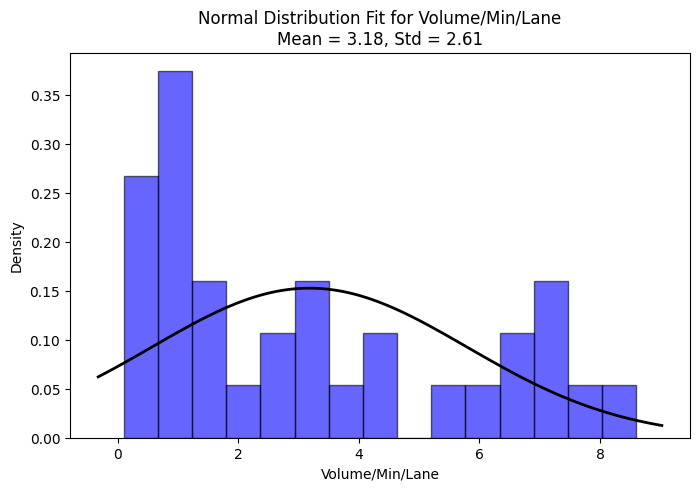

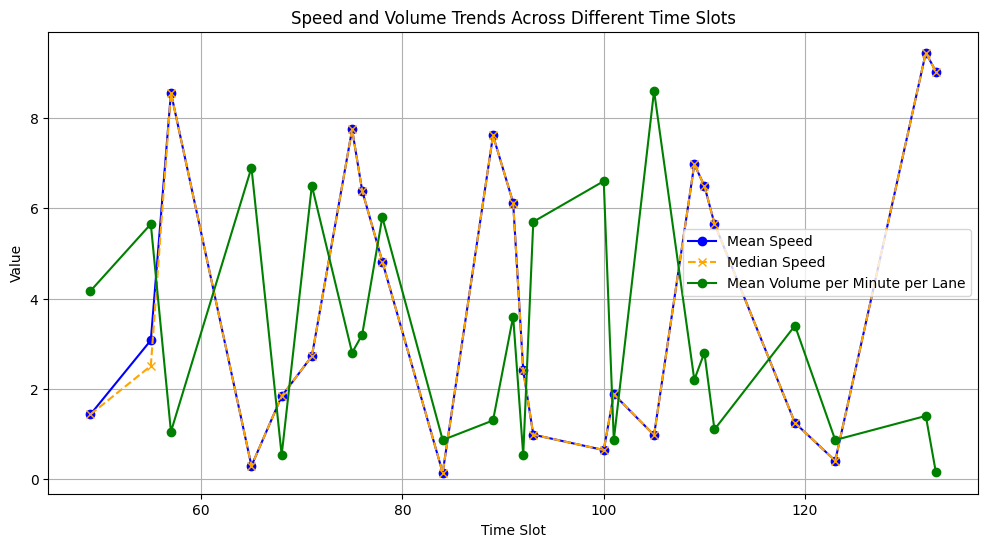

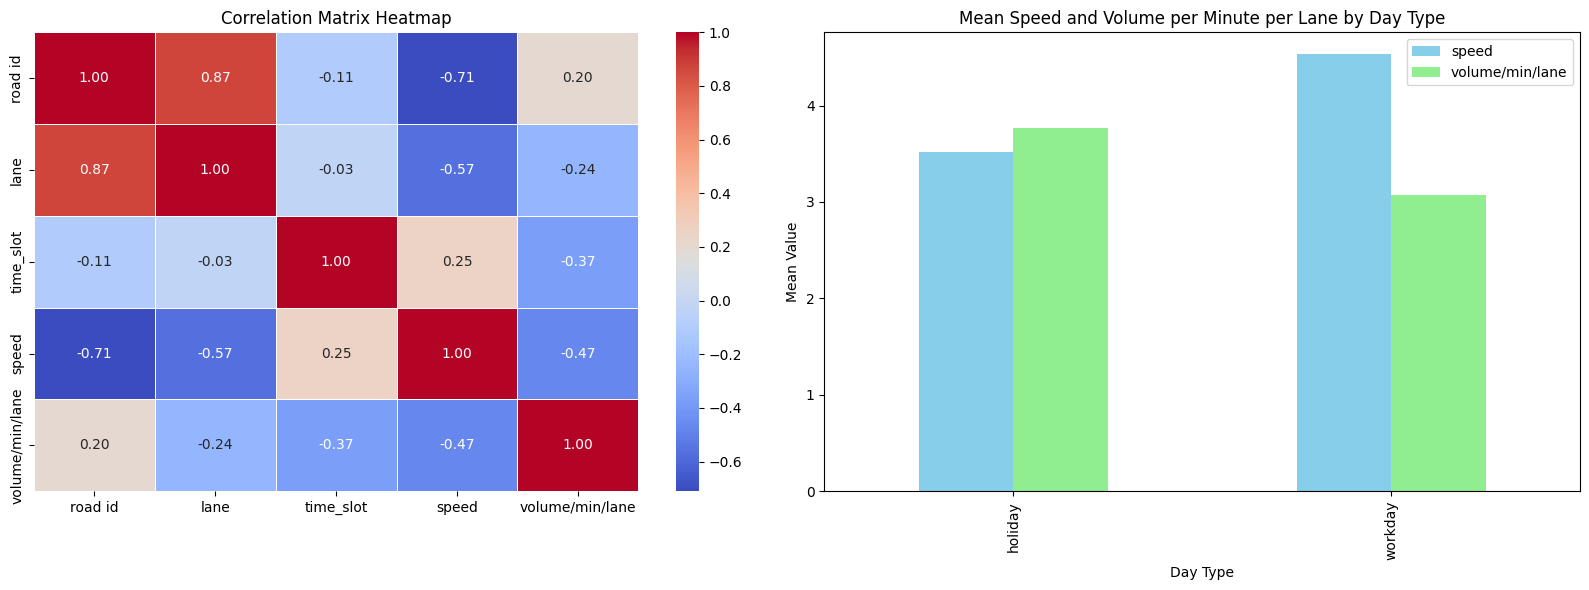

In [107]:
data = ground_truth_level3
normal_fit(data)
flow_speed_trend(data)
correlation_bar(data)

In [108]:
def vol_distribution(data, bin_size=5):
    # Fit a normal distribution to the data
    mean, std = norm.fit(data)
    mean, std = round(mean, 2), round(std, 2)
    
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Calculate the bin edges for equal frequency binning
    bin_edges = [sorted_data[int(i * n / bin_size)] for i in range(bin_size)]
    bin_edges.append(sorted_data[-1])

    # Calculate the probabilities for the normal distribution
    prob = norm.pdf(sorted_data, mean, std)
    norm_prob = prob / np.sum(prob)
    
    # Plot the distribution
    plt.plot(sorted_data, norm_prob, "-")
    plt.xticks(bin_edges, [round(x, 2) for x in bin_edges])
    plt.show()

    # Create a dictionary of volume ranges
    vol_dict = {i+1: [round(bin_edges[i], 2), round(bin_edges[i+1], 2)] for i in range(bin_size)}
    
    return (vol_dict, mean, std)

In [109]:
def map_volume_class(vol, vol_dict):
    for cls, (low, high) in vol_dict.items():
        if low <= vol <= high:
            return cls
    return None  # In case the value doesn't fall within any defined range

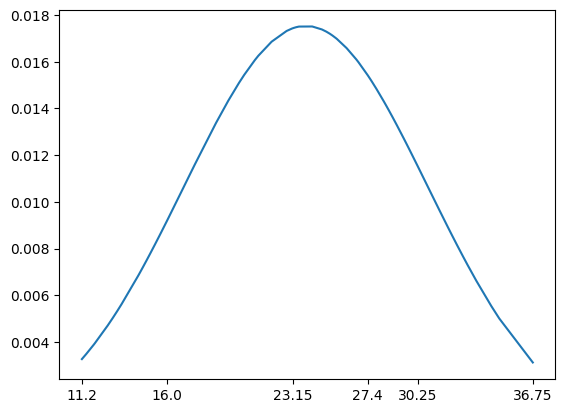

mean: 23.89 std: 6.92
volume distribution:
 {1: [11.2, 16.0], 2: [16.0, 23.15], 3: [23.15, 27.4], 4: [27.4, 30.25], 5: [30.25, 36.75]}


C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\3531756471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))


In [110]:
volume1 = ground_truth_level1['volume/min/lane']
vol_dict_level1, mean_level1, std_level1 = vol_distribution(volume1)

#assign volume class
ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))

print('mean:',mean_level1,'std:', std_level1)
print('volume distribution:\n',vol_dict_level1)

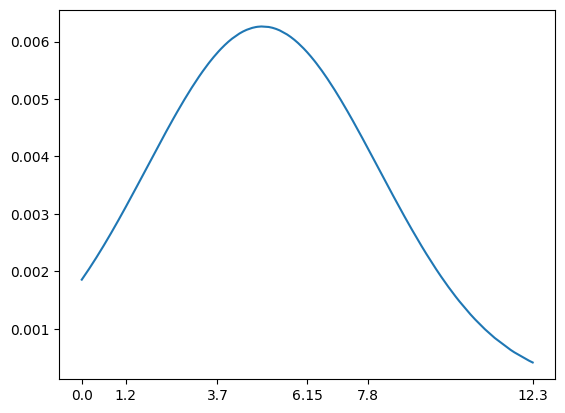

mean: 4.93 std: 3.16
volume distribution:
 {1: [0.0, 1.2], 2: [1.2, 3.7], 3: [3.7, 6.15], 4: [6.15, 7.8], 5: [7.8, 12.3]}


C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\2658309073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))


In [111]:
volume2 = ground_truth_level2['volume/min/lane']
vol_dict_level2, mean_level2, std_level2 = vol_distribution(volume2)

#assign volume class
ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))

print('mean:',mean_level2,'std:', std_level2)
print('volume distribution:\n',vol_dict_level2)

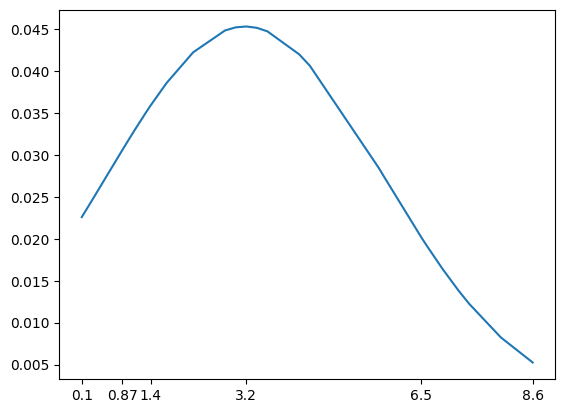

mean: 3.18 std: 2.61
volume distribution:
 {1: [0.1, 0.87], 2: [0.87, 1.4], 3: [1.4, 3.2], 4: [3.2, 6.5], 5: [6.5, 8.6]}


C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\3983861760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level3['volume_cls'] = ground_truth_level3['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level3))


In [112]:
volume3 = ground_truth_level3['volume/min/lane']
vol_dict_level3, mean_level3, std_level3 = vol_distribution(volume3)

#assign volume class
ground_truth_level3['volume_cls'] = ground_truth_level3['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level3))

print('mean:',mean_level3,'std:', std_level3)
print('volume distribution:\n',vol_dict_level3)

In [113]:
output_dir = 'D:/Thesis/files_output_dir/output_preprocessing/'
ground_truth_level1.to_csv(output_dir + 'ground_truth_level1.csv', index=False)
ground_truth_level2.to_csv(output_dir + 'ground_truth_level2.csv', index=False)
ground_truth_level3.to_csv(output_dir + 'ground_truth_level3.csv', index=False)

In [114]:
ground_truth_level1.head()

,road id,level,lane,dir,Day_type,time_slot,speed,volume/min/lane,volume_cls
5,8651,1,4,0,workday,103,0.898789,30.200000,4
9,8651,1,4,0,workday,63,3.973160,32.450000,5
17,8651,1,4,0,workday,112,1.423980,15.700000,1
21,16710,1,3,0,workday,56,4.619120,12.666667,1
25,8651,1,4,0,workday,80,9.817830,32.100000,5


In [115]:
import pickle
# Save to a file
output_dir = 'D:/Thesis/files_output_dir/output_preprocessing/'
with open(output_dir + 'vol_distribution_data.pkl', 'wb') as file:
    pickle.dump({
        'vol_dict1': vol_dict_level1,
        'vol_dict2': vol_dict_level2,
        'vol_dict3': vol_dict_level3,
        'mean1': mean_level1,
        'mean2': mean_level2,
        'mean3': mean_level3
    }, file)

In [116]:
## plot

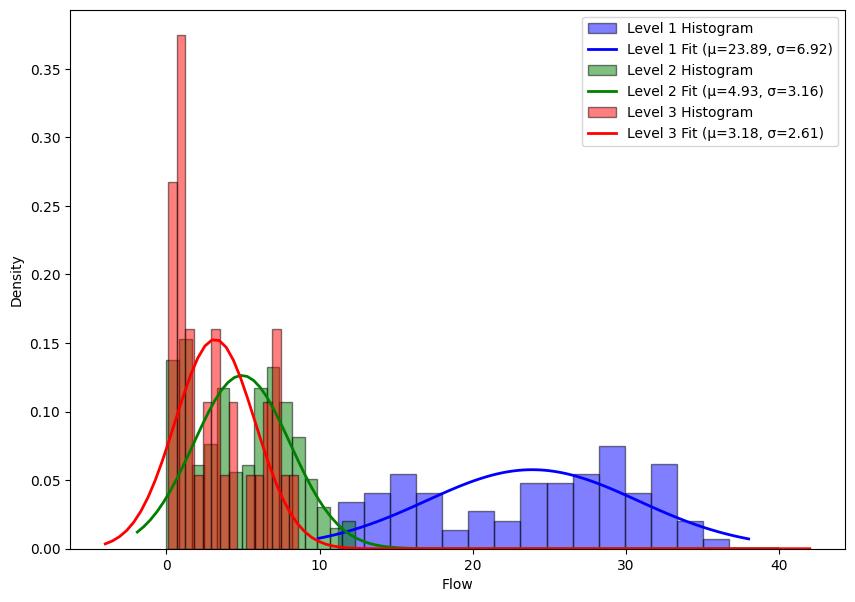

Level 1 - Mean: 23.89 Std: 6.92
Level 1 - Volume distribution: {1: [11.2, 16.0], 2: [16.0, 23.15], 3: [23.15, 27.4], 4: [27.4, 30.25], 5: [30.25, 36.75]}
Level 2 - Mean: 4.93 Std: 3.16
Level 2 - Volume distribution: {1: [0.0, 1.2], 2: [1.2, 3.7], 3: [3.7, 6.15], 4: [6.15, 7.8], 5: [7.8, 12.3]}
Level 3 - Mean: 3.18 Std: 2.61
Level 3 - Volume distribution: {1: [0.1, 0.87], 2: [0.87, 1.4], 3: [1.4, 3.2], 4: [3.2, 6.5], 5: [6.5, 8.6]}


C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\116977678.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\116977678.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))
C:\Users\mamun_pc\

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to fit a normal distribution and plot it
def normal_fit(data, label, color):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    
    # Plot the histogram of the data
    plt.hist(data, bins=15, density=True, alpha=0.5, color=color, edgecolor='black', label=f'{label} Histogram')
    
    # Plot the normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color, linewidth=2, label=f'{label} Fit (μ={mu:.2f}, σ={std:.2f})')

# Function to calculate the volume distribution
def vol_distribution(data, bin_size=5):
    # Fit a normal distribution to the data
    mean, std = norm.fit(data)
    mean, std = round(mean, 2), round(std, 2)
    
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Calculate the bin edges for equal frequency binning
    bin_edges = [sorted_data[int(i * n / bin_size)] for i in range(bin_size)]
    bin_edges.append(sorted_data[-1])
    
    # Create a dictionary of volume ranges
    vol_dict = {i+1: [round(bin_edges[i], 2), round(bin_edges[i+1], 2)] for i in range(bin_size)}
    
    return (vol_dict, mean, std)

# Function to map volume to its class
def map_volume_class(vol, vol_dict):
    for cls, (low, high) in vol_dict.items():
        if low <= vol <= high:
            return cls
    return None  # In case the value doesn't fall within any defined range


# Example data for three levels
# Replace these with your actual data
data_level1 = ground_truth_level1['volume/min/lane']
data_level2 = ground_truth_level2['volume/min/lane']
data_level3 = ground_truth_level3['volume/min/lane']

# Create a combined figure
plt.figure(figsize=(10, 7))

# Plot histograms and fits for each level
normal_fit(data_level1, 'Level 1', 'b')
normal_fit(data_level2, 'Level 2', 'g')
normal_fit(data_level3, 'Level 3', 'r')

# Titles and labels
# plt.title('Normal Distribution Fit for Volume/Min/Lane for Different Road Levels')
# Set x and y labels with font size
plt.xlabel('Flow', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show legend with font size
plt.legend(fontsize=12)

# Show the combined plot
plt.show()

# Calculate the volume distribution for each level
vol_dict_level1, mean_level1, std_level1 = vol_distribution(data_level1)
vol_dict_level2, mean_level2, std_level2 = vol_distribution(data_level2)
vol_dict_level3, mean_level3, std_level3 = vol_distribution(data_level3)

# Assign volume classes for each level
ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))
ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))
ground_truth_level3['volume_cls'] = ground_truth_level3['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level3))

# Print the results
print('Level 1 - Mean:', mean_level1, 'Std:', std_level1)
print('Level 1 - Volume distribution:', vol_dict_level1)
print('Level 2 - Mean:', mean_level2, 'Std:', std_level2)
print('Level 2 - Volume distribution:', vol_dict_level2)
print('Level 3 - Mean:', mean_level3, 'Std:', std_level3)
print('Level 3 - Volume distribution:', vol_dict_level3)


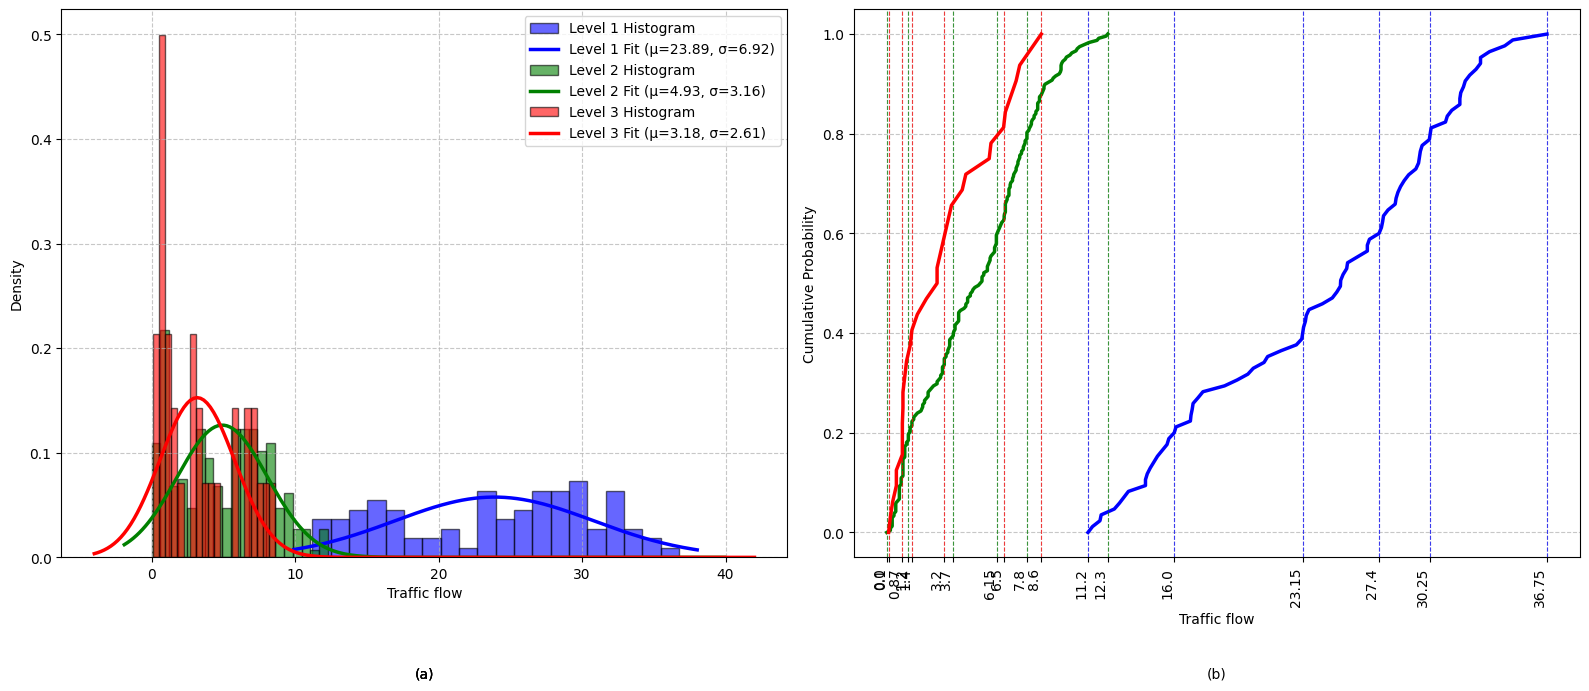

Level 1 - Mean: 23.89 Std: 6.92
Level 1 - Volume distribution: {1: [11.2, 16.0], 2: [16.0, 23.15], 3: [23.15, 27.4], 4: [27.4, 30.25], 5: [30.25, 36.75]}
Level 2 - Mean: 4.93 Std: 3.16
Level 2 - Volume distribution: {1: [0.0, 1.2], 2: [1.2, 3.7], 3: [3.7, 6.15], 4: [6.15, 7.8], 5: [7.8, 12.3]}
Level 3 - Mean: 3.18 Std: 2.61
Level 3 - Volume distribution: {1: [0.1, 0.87], 2: [0.87, 1.4], 3: [1.4, 3.2], 4: [3.2, 6.5], 5: [6.5, 8.6]}


C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\1334039407.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_28964\1334039407.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))
C:\Users\mamun_p

In [118]:
# Function to fit a normal distribution and plot it
def normal_fit(ax, data, label, color):
    # Fit a normal distribution to the data
    mu, std = norm.fit(data)
    
    # Plot the histogram of the data with smaller bin sizes for detail
    ax.hist(data, bins=20, density=True, alpha=0.6, color=color, edgecolor='black', label=f'{label} Histogram')
    
    # Plot the normal distribution curve with increased line width
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 200)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, color, linewidth=2.5, label=f'{label} Fit (μ={mu:.2f}, σ={std:.2f})')
    ax.set_xlabel('Traffic flow')
    ax.set_ylabel('Density')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    ax.text(0.5, -0.2, '(a)',
         transform=ax.transAxes, fontsize=10, ha='center', va='top', wrap=True)

# Function to calculate the volume distribution and plot it
def vol_distribution(ax, data, bin_size=5, color='b', label=''):
    # Fit a normal distribution to the data
    mean, std = norm.fit(data)
    mean, std = round(mean, 2), round(std, 2)
    
    # Sort the data
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Calculate the bin edges for equal frequency binning
    bin_edges = [sorted_data[int(i * n / bin_size)] for i in range(bin_size)]
    bin_edges.append(sorted_data[-1])
    
    # Create a dictionary of volume ranges
    vol_dict = {i+1: [round(bin_edges[i], 2), round(bin_edges[i+1], 2)] for i in range(bin_size)}
    
    # Calculate the probabilities for the sorted data (for plotting)
    norm_prob = np.linspace(0, 1, len(sorted_data))
    
    # Plot the distribution with increased line width for clarity
    ax.plot(sorted_data, norm_prob, color=color, linestyle="-", linewidth=2.5, label=f'{label} Cumulative Distribution')
    
    # Add vertical lines for each bin edge
    for edge in bin_edges:
        ax.axvline(x=edge, color=color, linestyle="--", linewidth=0.8, alpha=0.7)
    
    return (vol_dict, mean, std, bin_edges)

# Example data for three levels
# Replace these with your actual data
data_level1 = ground_truth_level1['volume/min/lane']
data_level2 = ground_truth_level2['volume/min/lane']
data_level3 = ground_truth_level3['volume/min/lane']

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot histograms and fits for each level in the first subplot
normal_fit(ax1, data_level1, 'Level 1', 'b')
normal_fit(ax1, data_level2, 'Level 2', 'g')
normal_fit(ax1, data_level3, 'Level 3', 'r')
# ax1.set_title('Normal Distribution Fit for Volume/Min/Lane')

# Plot the cumulative distributions for each level in the second subplot
vol_dict_level1, mean_level1, std_level1, edges_level1 = vol_distribution(ax2, data_level1, color='b', label='Level 1')
vol_dict_level2, mean_level2, std_level2, edges_level2 = vol_distribution(ax2, data_level2, color='g', label='Level 2')
vol_dict_level3, mean_level3, std_level3, edges_level3 = vol_distribution(ax2, data_level3, color='r', label='Level 3')

# Combine all bin edges and ensure unique x-tick labels
all_bin_edges = sorted(set(edges_level1 + edges_level2 + edges_level3))
ax2.set_xticks(all_bin_edges)
ax2.set_xticklabels([round(x, 2) for x in all_bin_edges], rotation=90, ha='right')

# Set title and grid for the cumulative distribution plot
# ax2.set_title('Cumulative Volume Distribution with Equal Frequency Bins')
ax2.set_xlabel('Traffic flow')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, linestyle='--', alpha=0.7)
# Add caption below the plot associated with ax2
ax2.text(0.5, -0.2, '(b)',
         transform=ax2.transAxes, fontsize=10, ha='center', va='top', wrap=True)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Assign volume classes for each level
ground_truth_level1['volume_cls'] = ground_truth_level1['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level1))
ground_truth_level2['volume_cls'] = ground_truth_level2['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level2))
ground_truth_level3['volume_cls'] = ground_truth_level3['volume/min/lane'].map(lambda vol: map_volume_class(vol, vol_dict_level3))

# Print the results
print('Level 1 - Mean:', mean_level1, 'Std:', std_level1)
print('Level 1 - Volume distribution:', vol_dict_level1)
print('Level 2 - Mean:', mean_level2, 'Std:', std_level2)
print('Level 2 - Volume distribution:', vol_dict_level2)
print('Level 3 - Mean:', mean_level3, 'Std:', std_level3)
print('Level 3 - Volume distribution:', vol_dict_level3)